# Reading MAGIC Monte Carlo data

### Setup:

1. Need the `magic-gammas.parquet` and `magic-protons.parquet` files.
2. Need a python environment with python 3.10 or higher, pandas, numpy, and matplotlib.
3. Optionally install ipython and ipykernel to use this notebook interactively.

In [169]:
import math
import sys
import pandas as pd
import matplotlib.pyplot as plt

# add the parent directory of magicdl to the python path
sys.path.append("/path/to/magicdl/parent")

from magicdl import magic

### Plot the MAGIC camera
- Here you can see the layout and how the pixel numbering works

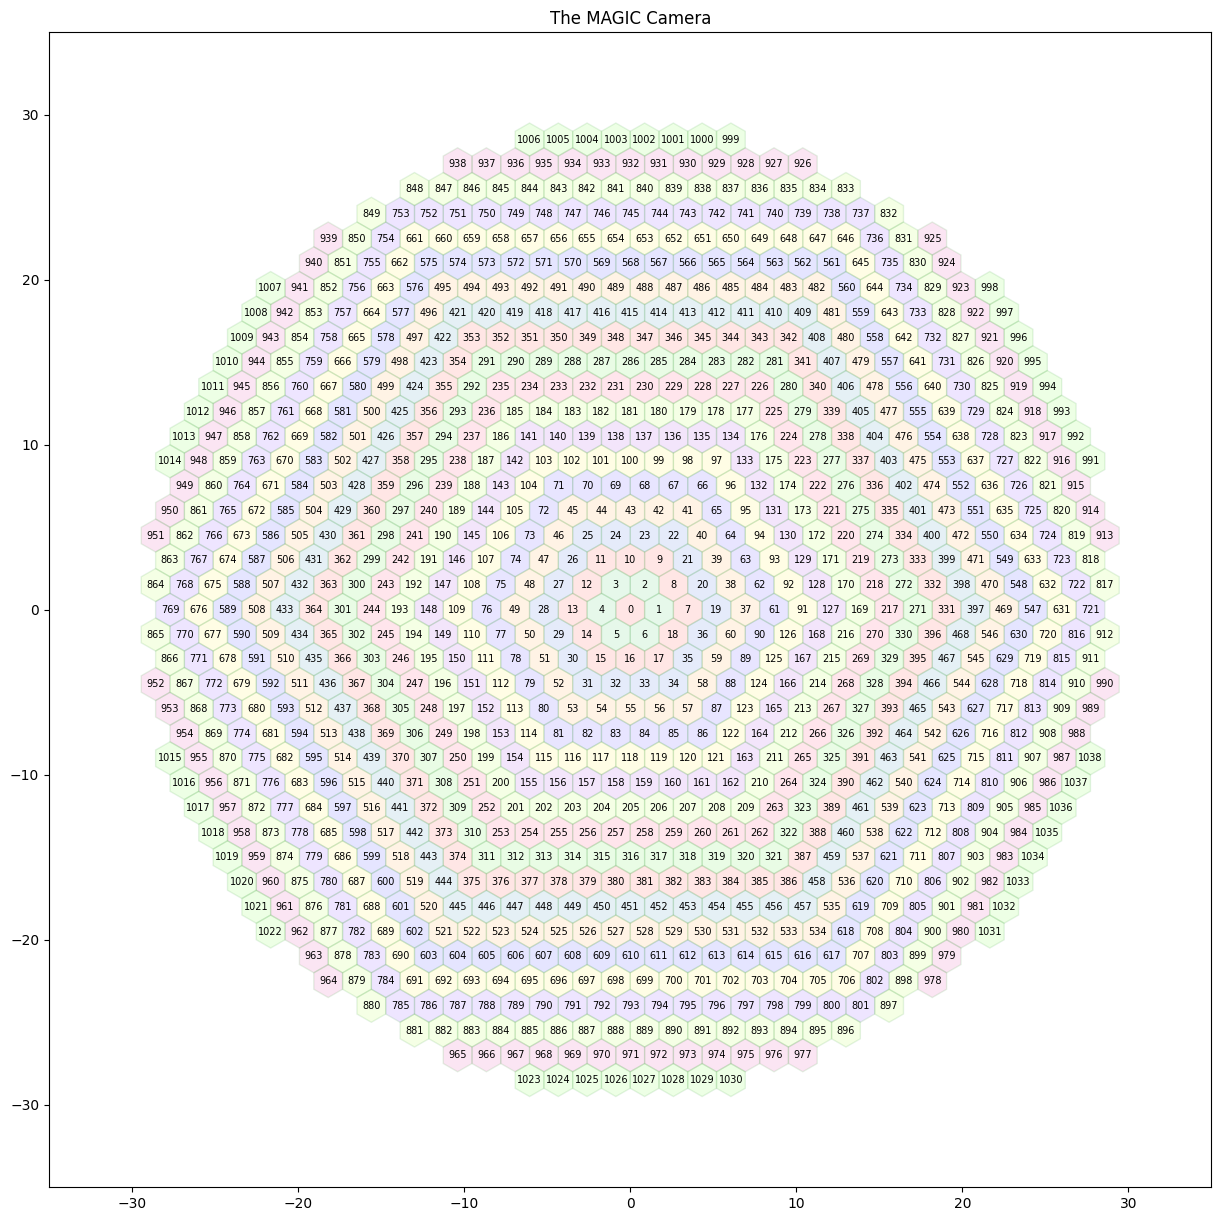

In [99]:
camera = magic.Camera()
camera.plot_camera(figsize=15)

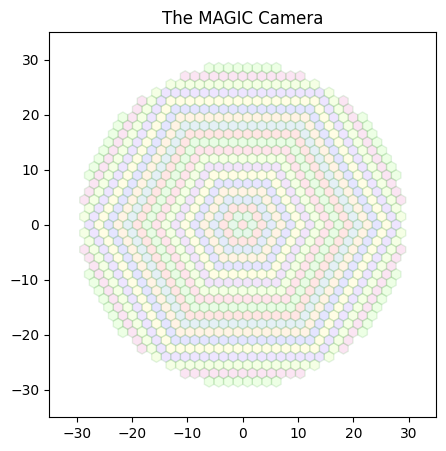

In [100]:
camera.plot_camera(figsize=5, text=False)

In [133]:
# play around with the camera geometry

# get the neighbors of a pixel
print("Neighbors of pixel 0:")
print(camera.get_pixel_neighbors(0))

# get the coordinates of a pixel
# assumes a unit hexagon where each side is 1 unit long
# therefore the distance between opposite sides and neighboring pixel centers are both sqrt(3) units
print("\nCoordinates of pixel 0:")
print(camera.get_pixel_coordinates_xy(0))
print("\nCoordinates of pixel 1:")
print(camera.get_pixel_coordinates_xy(1))


Neighbors of pixel 0:
[1, 2, 3, 4, 5, 6]

Coordinates of pixel 0:
(0.0, -0.0)

Coordinates of pixel 1:
(1.7320508075688772, -0.0)


### Import the data
- gammas [2.82GB]
- protons [815MB]
- might take a minute to load

In [2]:
gamma_file = "./magic-gammas.parquet"
proton_file = "./magic-protons.parquet"

gammas = pd.read_parquet(gamma_file)
protons = pd.read_parquet(proton_file)


### Explore the data
- Note: every event has a unique combination of `run_number` and `event_number`
- Each run has ~10-100 stereoscopic events
- `run_number` and `event_number` are type(uint32)
- all other columns are type(float32)

In [3]:
print("Info:")
print(f"{len(gammas)} gamma events")
print(f"{len(protons)} proton events")

Info:
374069 gamma events
105174 proton events


Notes about columns:
- columns starting with 'true' are the true values of the event used to simulate the images
- columns starting with 'hillas' and 'stereo' are the reconstructed values (parameterizations) from the cleaned images
- image_m1 and image_m2 are the charge collected in each pixel of the camera, as converted by an ADC (Analog to Digital Converter), (unit is a count)
- cleaned_image_m1 and cleaned_image_m2 are the charge collected in each pixel after applying the pixel-wise gain corrections (unit is a count of photoelectrons)
- timing_m1 and timing_m2 are the average arrival times of photons in the camera in each pixel (unit is nanoseconds)

In [97]:
# get a random proton event
random_proton = protons.sample(1).iloc[0]

# show the columns and their types
for value, col in zip(random_proton, protons.columns):
    if hasattr(value, "__len__"):
        print(f"- {col:40}: array len[{len(value)}]")
    else:
        print(f"- {col:40}: {value} ")



- event_number                            : 123 
- run_number                              : 112943 
- true_energy                             : 6837.28955078125 
- true_theta                              : 0.5798368453979492 
- true_phi                                : -2.4376280307769775 
- true_telescope_theta                    : 0.6011051535606384 
- true_telescope_phi                      : 3.873748302459717 
- true_first_interaction_height           : 2007704.0 
- hillas_length_m1                        : 107.78070068359375 
- hillas_width_m1                         : 49.19365310668945 
- hillas_delta_m1                         : 1.3105571269989014 
- hillas_size_m1                          : 2742.65625 
- hillas_cog_x_m1                         : -122.77865600585938 
- hillas_cog_y_m1                         : -23.759489059448242 
- hillas_sin_delta_m1                     : 0.9663284420967102 
- hillas_cos_delta_m1                     : 0.2573116719722748 
- hillas_length_m2   

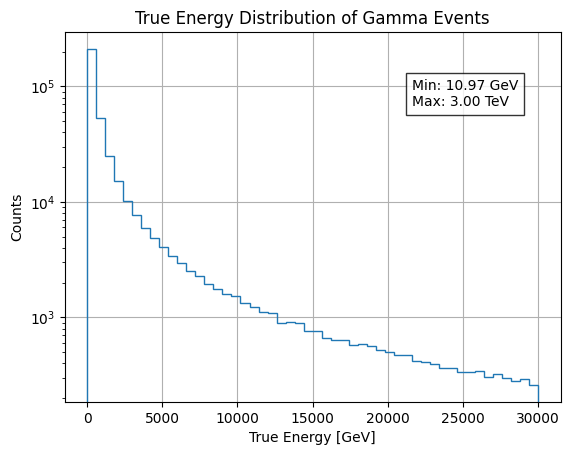

In [160]:
# plot the distribution of the true energy
gammas.true_energy.hist(log=True, bins=50, histtype="step")
plt.xlabel("True Energy [GeV]")
plt.ylabel("Counts")
plt.title("True Energy Distribution of Gamma Events")
# add min and max to text on the plot

plt.text(
    0.7, 
    0.8, 
    f"Min: {gammas.true_energy.min():.2f} GeV\nMax: {gammas.true_energy.max()/10000:.2f} TeV", 
    transform=plt.gca().transAxes, 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

plt.show()


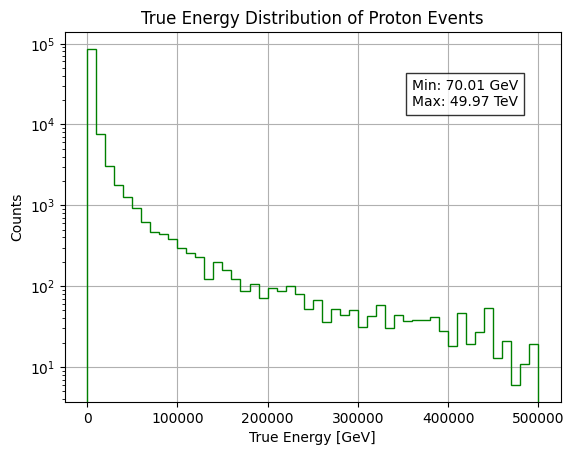

In [158]:
# plot the distribution of the true energy
protons.true_energy.hist(log=True, bins=50, histtype="step", color="green")
plt.xlabel("True Energy [GeV]")
plt.ylabel("Counts")
plt.title("True Energy Distribution of Proton Events")
# add min and max to text on the plot

plt.text(
    0.7, 
    0.8, 
    f"Min: {protons.true_energy.min():.2f} GeV\nMax: {protons.true_energy.max()/10000:.2f} TeV", 
    transform=plt.gca().transAxes, 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

plt.show()


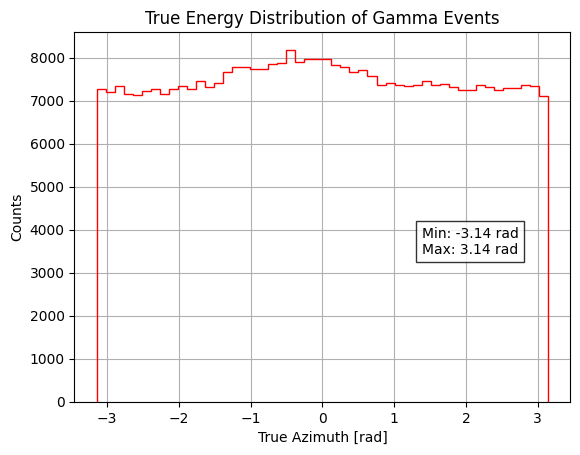

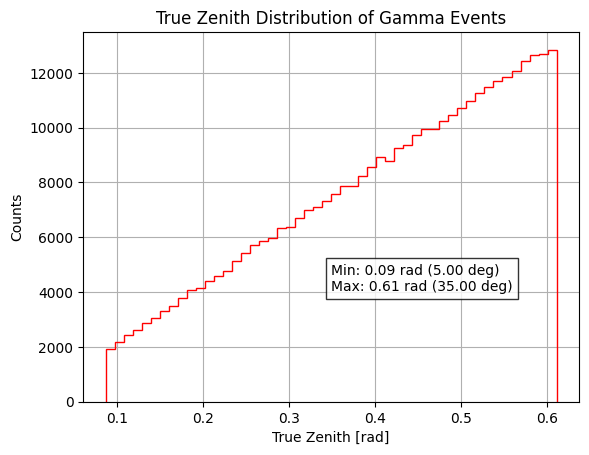

In [172]:
# plot the distribution of the pointing direction (theta and phi)
gammas.true_phi.hist(bins=50, histtype="step", color="red")
plt.xlabel("True Azimuth [rad]")
plt.ylabel("Counts")
plt.title("True Energy Distribution of Gamma Events")
# add min and max to text on the plot

plt.text(
    0.7, 
    0.4, 
    f"Min: {gammas.true_phi.min():.2f} rad\nMax: {gammas.true_phi.max():.2f} rad", 
    transform=plt.gca().transAxes, 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

plt.show()

gammas.true_theta.hist(bins=50, histtype="step", color="red")
plt.xlabel("True Zenith [rad]")
plt.ylabel("Counts")
plt.title("True Zenith Distribution of Gamma Events")

plt.text(
    0.5, 
    0.3, 
    (
        f"Min: {gammas.true_theta.min():.2f} rad ({gammas.true_theta.min()*180/math.pi:.2f} deg)\n"
        f"Max: {gammas.true_theta.max():.2f} rad ({gammas.true_theta.max()*180/math.pi:.2f} deg)"
    ), 
    transform=plt.gca().transAxes, 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)
plt.show()


### Plot some events

In [68]:
# get a random proton event
random_proton = protons.sample(1)

# show the row with all columns
with pd.option_context("display.max_columns", None):
    display(random_proton)

# get the row as a series
random_proton = random_proton.iloc[0]



event_number  run_number   true_energy  true_theta  true_phi  \
21           248      117031  24270.337891    0.463865 -0.195068   

    true_telescope_theta  true_telescope_phi  true_first_interaction_height  \
21              0.398517            6.045911                      1522240.5   

    hillas_length_m1  hillas_width_m1  hillas_delta_m1  hillas_size_m1  \
21              -1.0             -1.0              0.0            -1.0   

    hillas_cog_x_m1  hillas_cog_y_m1  hillas_sin_delta_m1  \
21              0.0              0.0                  0.0   

    hillas_cos_delta_m1  hillas_length_m2  hillas_width_m2  hillas_delta_m2  \
21                  0.0              -1.0             -1.0              0.0   

    hillas_size_m2  hillas_cog_x_m2  hillas_cog_y_m2  hillas_sin_delta_m2  \
21            -1.0              0.0              0.0                  0.0   

    hillas_cos_delta_m2  stereo_direction_x  stereo_direction_y  \
21                  0.0                 NaN                 NaN   

    stereo_zenith  stereo_azimuth  stereo_dec  stereo_ra  stereo_theta2  \
21            NaN             NaN         NaN        NaN           -1.0   

    stereo_core_x  stereo_core_y  stereo_impact_m1  stereo_impact_m2  \
21            NaN            NaN              -1.0              -1.0   

    stereo_impact_azimuth_m1  stereo_impact_azimuth_m2  \
21                       NaN                       NaN   

    stereo_shower_max_height  stereo_xmax  stereo_cherenkov_radius  \
21                      -1.0         -1.0                     -1.0   

    stereo_cherenkov_density  stereo_baseline_phi_m1  stereo_baseline_phi_m2  \
21                      -1.0                     NaN                     NaN   

    stereo_image_angle  stereo_cos_between_shower  pointing_zenith  \
21                 NaN                        NaN         22.83337   

    pointing_azimuth  time_gradient_m1  time_gradient_m2  true_impact_m1  \
21        186.594826              -1.0              -1.0    58482.992188   

    true_impact_m2  source_alpha_m1  source_dist_m1  \
21    62892.476562              0.0            -1.0   

    source_cos_delta_alpha_m1  source_dca_m1  source_dca_delta_m1  \
21                        0.0           -1.0                  0.0   

    source_alpha_m2  source_dist_m2  source_cos_delta_alpha_m2  source_dca_m2  \
21              0.0            -1.0                        0.0           -1.0   

    source_dca_delta_m2                                           image_m1  \
21                  0.0  [1.14453125, 1.015625, 0.2431640625, 1.5273437...   

                                             image_m2  \
21  [2.1796875, 1.6484375, 1.1953125, 3.75, 2.2890...   

                                       clean_image_m1  \
21  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                       clean_image_m2  \
21  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                            timing_m1  \
21  [43.75, 23.375, 44.125, 30.75, 43.25, 29.75, 5...   

                                            timing_m2  
21  [26.0625, 25.625, 18.0625, 24.5, 11.59375, 26....

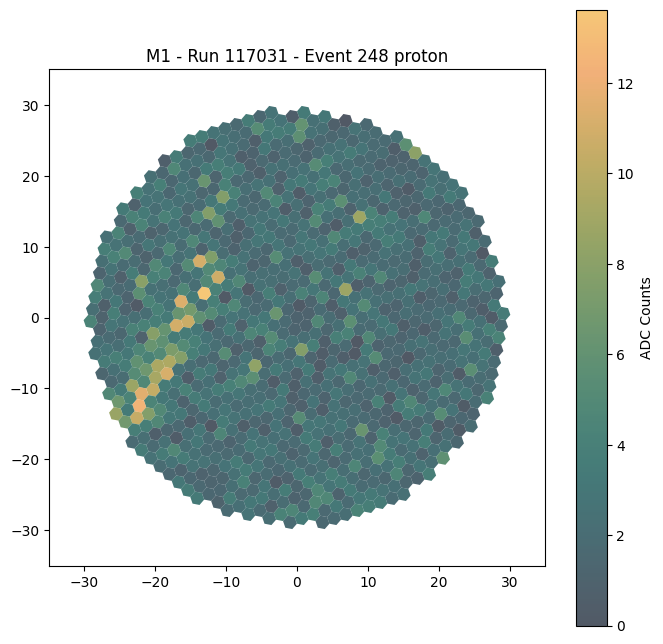

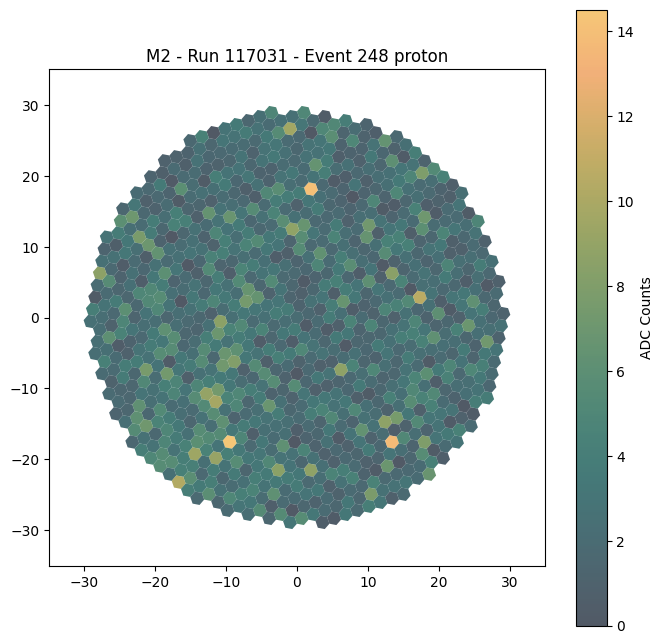

In [78]:
# plot both telescopes
event = magic.Event(random_proton, "proton")
event.plot(telescope_id=1, title=True)
event.plot(telescope_id=2, title=True)


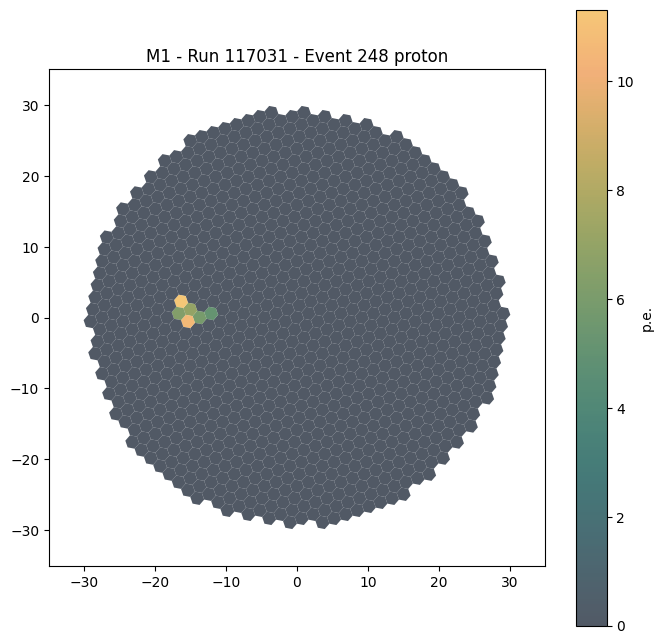

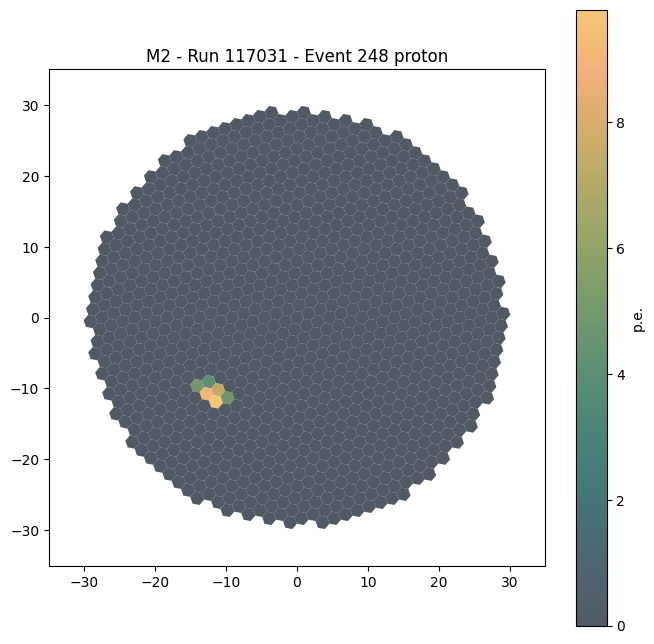

In [79]:
# plot cleaned images
event.plot(telescope_id=1, cleaned=True, title=True)
event.plot(telescope_id=2, cleaned=True, title=True)


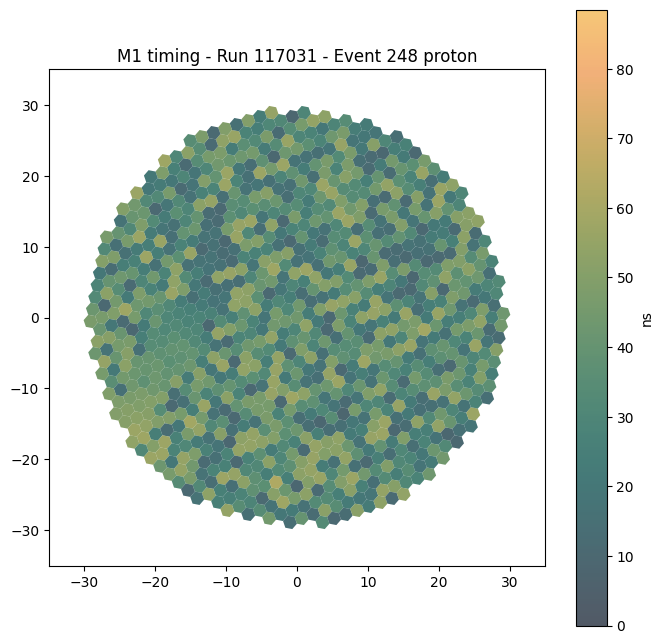

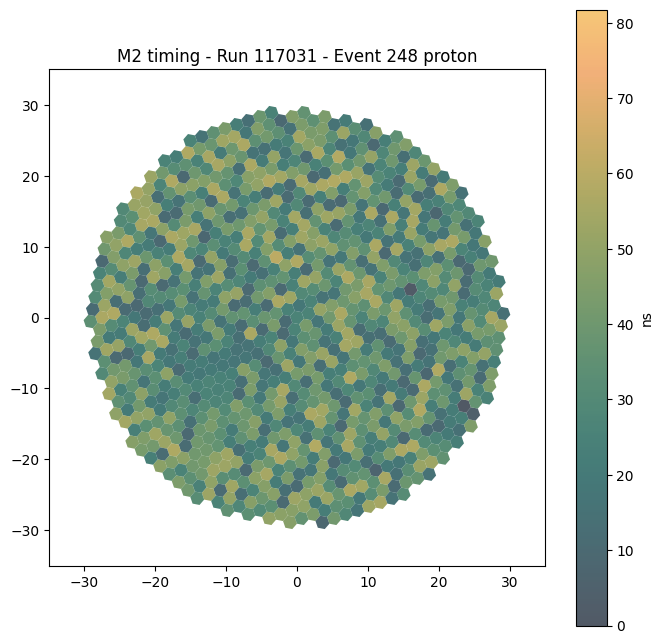

In [81]:
# plot the arrival time information
event.plot(telescope_id=1, timing=True, title=True, cleaned=True)
event.plot(telescope_id=2, timing=True, title=True, cleaned=True)


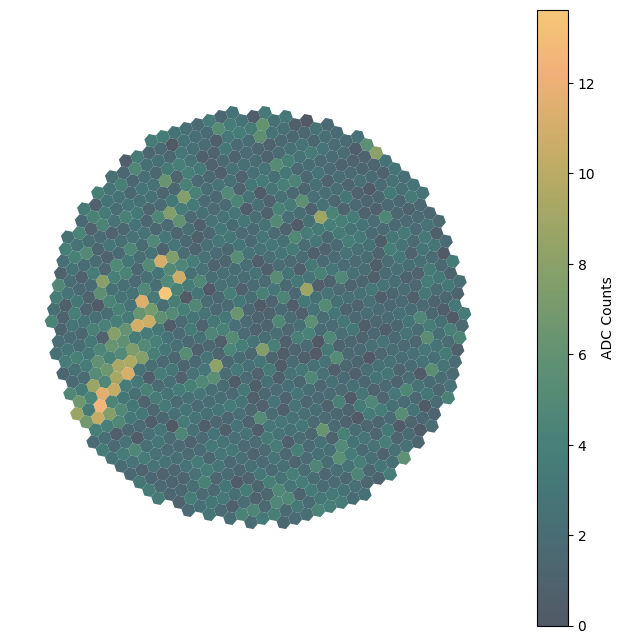

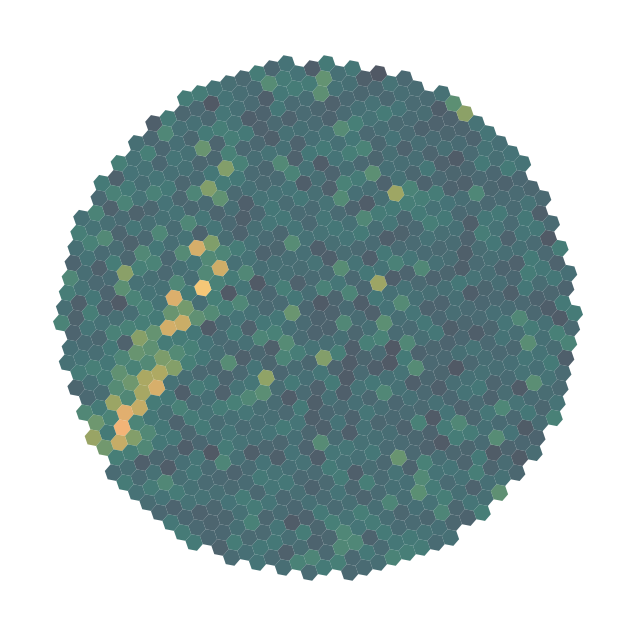

In [75]:
# plot an image with no axes/info
event.plot(telescope_id=1, hide_axes=True)
event.plot(telescope_id=1, simple=True)

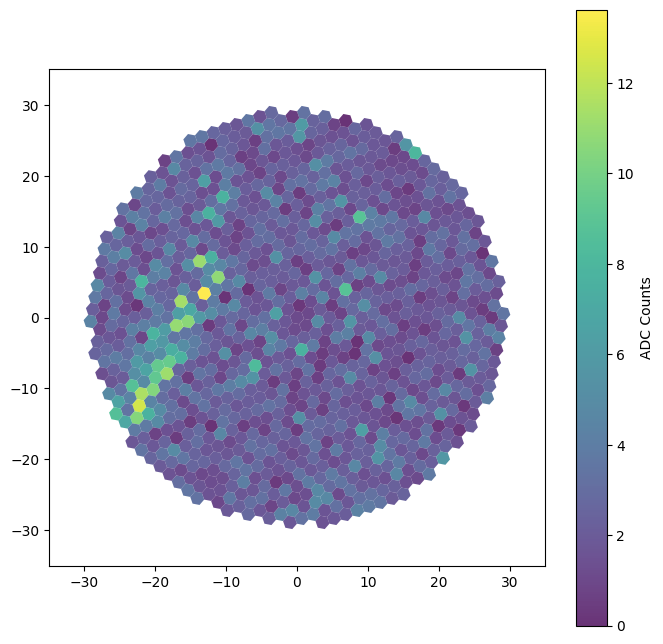

In [76]:
# plot with your a standard matplotlib colormap
event.plot(telescope_id=1, colormap="viridis")

### Plot some pretty events

In [63]:
# get a pretty gamma sample and a pretty proton sample
ex_proton_run = 118115
ex_proton_event = 55
ex_proton = protons[(protons.run_number == ex_proton_run) & (protons.event_number == ex_proton_event)].iloc[0]

ex_gamma_run = 823075
ex_gamma_event = 934
ex_gamma = gammas[(gammas.run_number == ex_gamma_run) & (gammas.event_number == ex_gamma_event)].iloc[0]

Cool proton event:


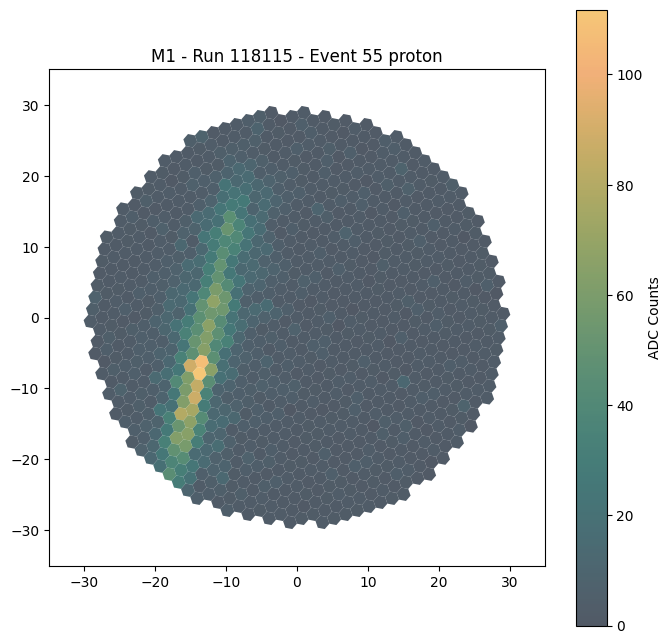

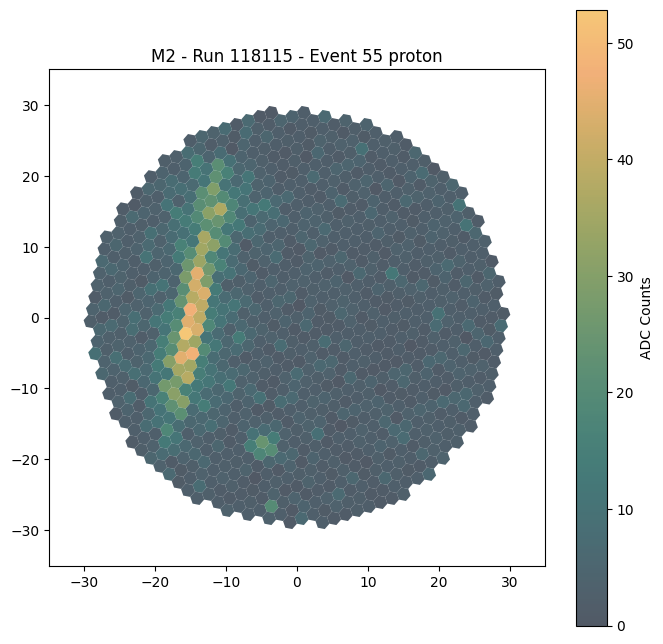

Cool gamma event:


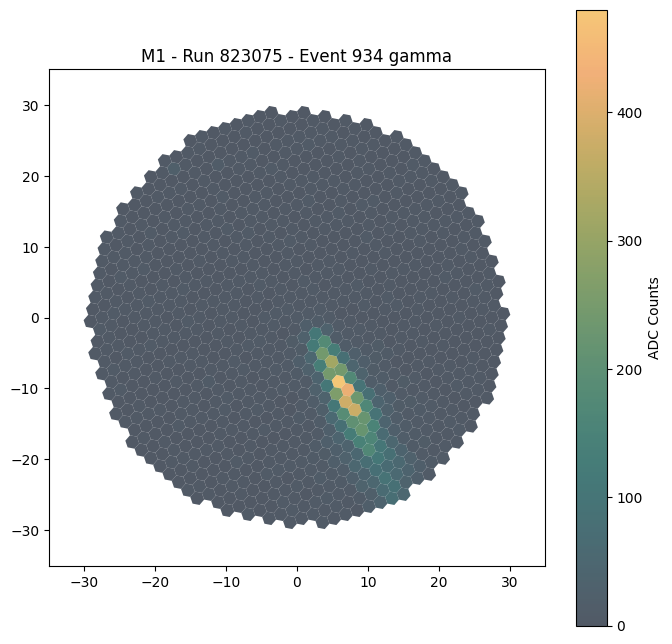

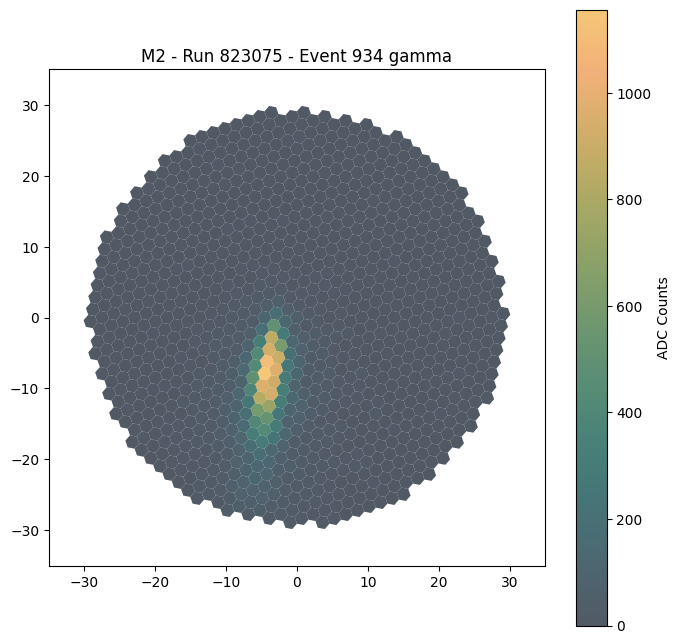

Cleaned proton event:


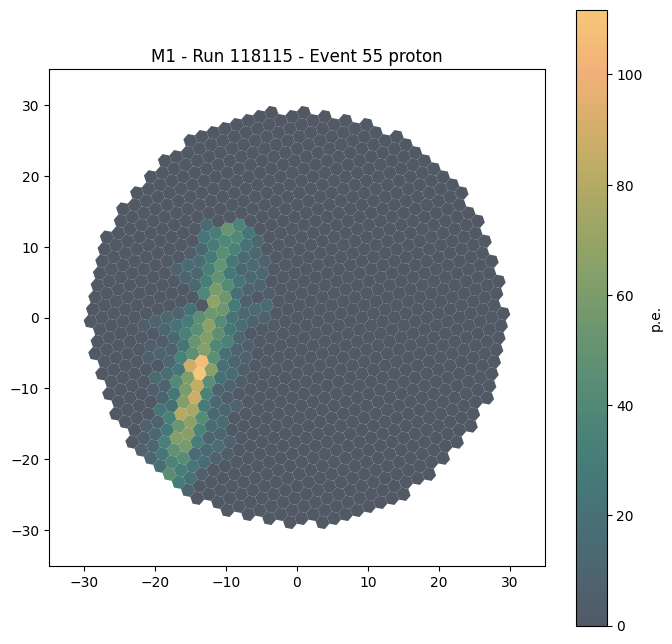

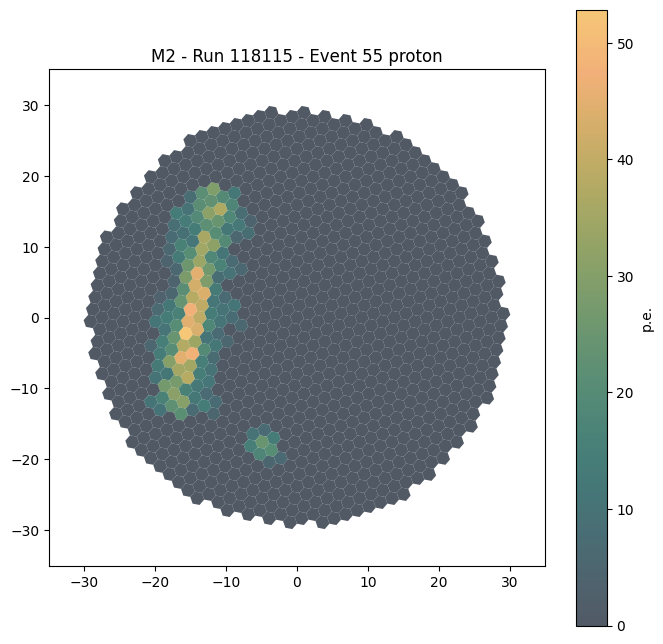

Cleaned gamma event:


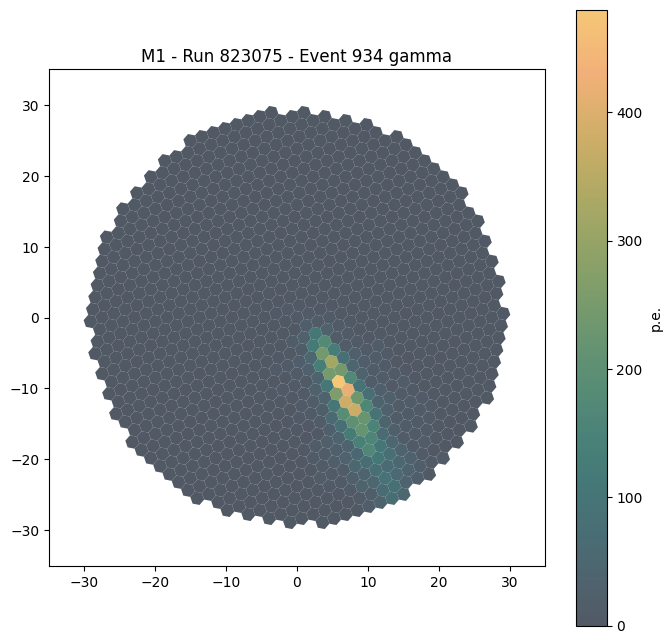

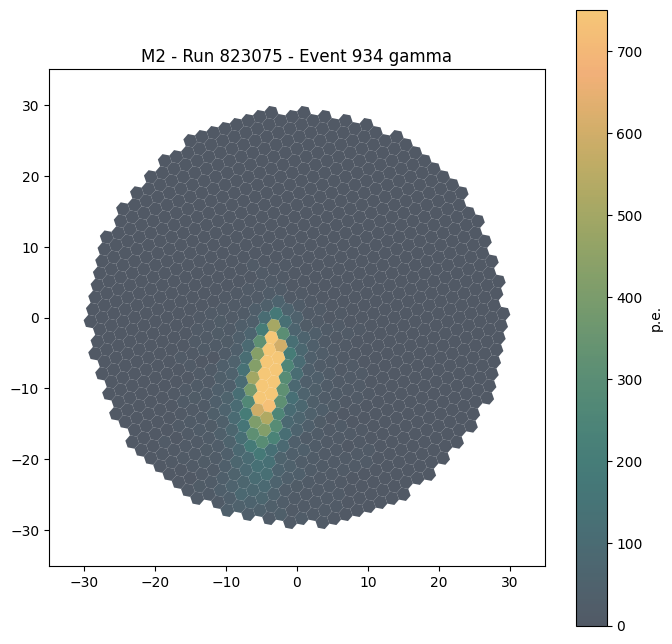

Arrival time of proton event:


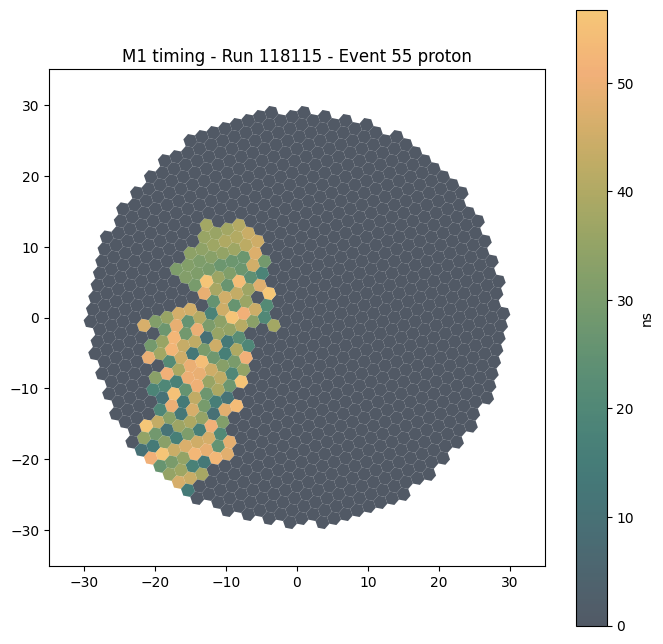

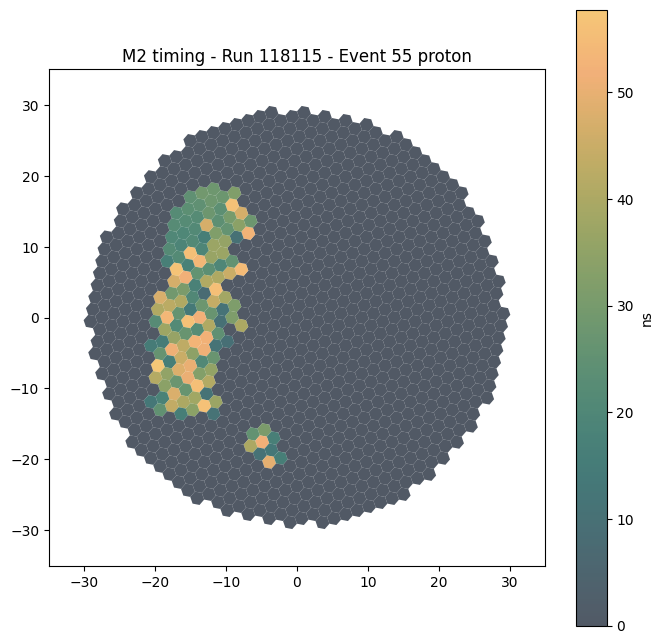

Arrival time of gamma event:


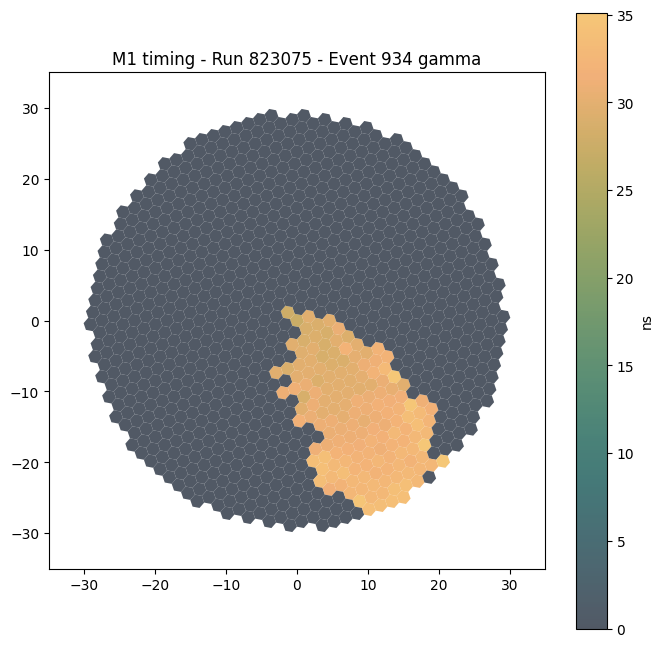

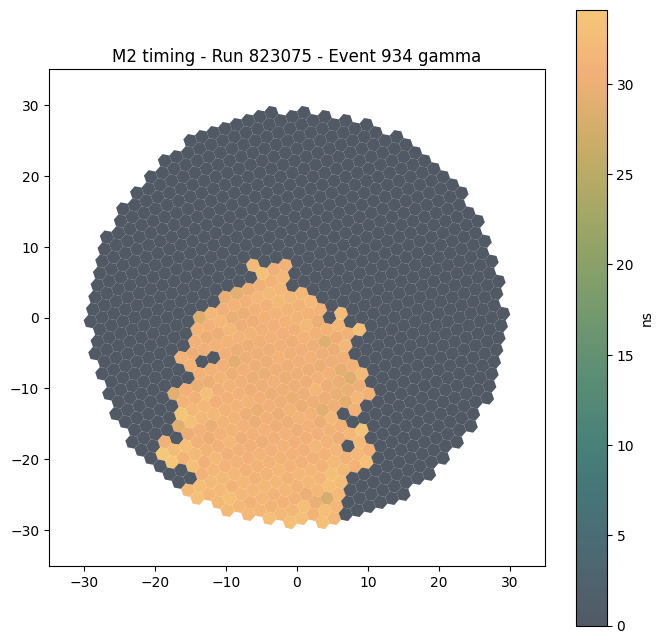

In [91]:
# import the event
nice_proton = magic.Event(ex_proton, "proton")
nice_gamma = magic.Event(ex_gamma, "gamma")

# plot the proton
print("Cool proton event:")
nice_proton.plot(telescope_id=1, title=True)
nice_proton.plot(telescope_id=2, title=True)

# plot the gamma
print("Cool gamma event:")
nice_gamma.plot(telescope_id=1, title=True)
nice_gamma.plot(telescope_id=2, title=True)

# plot the cleaned images
print("Cleaned proton event:")
nice_proton.plot(telescope_id=1, cleaned=True, title=True)
nice_proton.plot(telescope_id=2, cleaned=True, title=True)

print("Cleaned gamma event:")
nice_gamma.plot(telescope_id=1, cleaned=True, title=True)
nice_gamma.plot(telescope_id=2, cleaned=True, title=True)

# plot the arrival time information
print("Arrival time of proton event:")
nice_proton.plot(telescope_id=1, timing=True, title=True, cleaned=True)
nice_proton.plot(telescope_id=2, timing=True, title=True, cleaned=True)

print("Arrival time of gamma event:")
nice_gamma.plot(telescope_id=1, timing=True, title=True, cleaned=True)
nice_gamma.plot(telescope_id=2, timing=True, title=True, cleaned=True)

